 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [270]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [3]:
folderpath = Path('Resources')

# Reading whale returns
csvpath = folderpath / Path('whale_returns.csv')
whale_returns = pd.read_csv(csvpath, index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
csvpath = folderpath / Path('algo_returns.csv')
algo_returns = pd.read_csv(csvpath, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
csvpath = folderpath / Path('sp_tsx_history.csv')
sp_tsx_history = pd.read_csv(csvpath, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp_tsx_history.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [10]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp_tsx_history['Close']  = sp_tsx_history['Close'].str.replace('[\$,]','',regex=True).astype(float)

sp_tsx_history.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [12]:
# Calculate Daily Returns
sp_tsx_returns = sp_tsx_history.pct_change()
sp_tsx_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [13]:
# Drop nulls
sp_tsx_returns = sp_tsx_returns.dropna()
sp_tsx_returns.isnull().sum()

Close    0
dtype: int64

In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns.columns = ['S&P TSX 60']
sp_tsx_returns.dtypes

S&P TSX 60    float64
dtype: object

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns = pd.concat([whale_returns, algo_returns, sp_tsx_returns], axis='columns', join='inner')
all_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

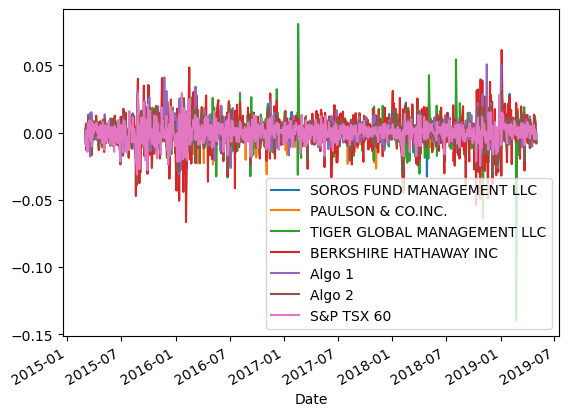

In [16]:
# Plot daily returns of all portfolios
all_returns.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

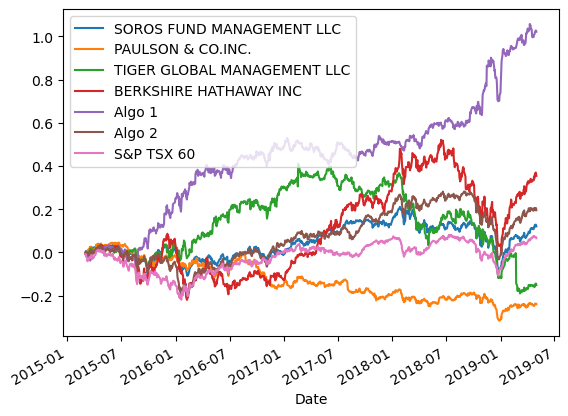

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_returns).cumprod() - 1
cumulative_returns
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

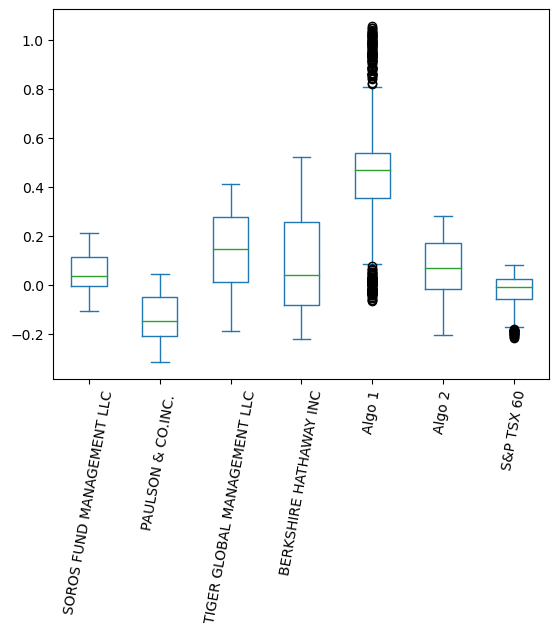

In [18]:
# Box plot to visually show risk
cumulative_returns.plot.box(rot=80)

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
daily_std = all_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX 60                     0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [20]:
# Calculate  the daily standard deviation of S&P TSX 60
tsx60_std = daily_std['S&P TSX 60']
# Determine whicfh portfolios are riskier than the S&P TSX 60
riskierthan_tsx60 = {}
for strat in daily_std.index:
    if daily_std[strat] > tsx60_std:
        riskierthan_tsx60[strat] = daily_std[strat]

print(f"Portfolios riskier than S&P TSX 60: {list(riskierthan_tsx60.keys())}")

Portfolios riskier than S&P TSX 60: ['SOROS FUND MANAGEMENT LLC', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2']


### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
# Annualized Standard Deviation = Daily Standard Deviation * Square Root (Trading Days)
trading_days = 252
annual_std = daily_std * (trading_days ** (1/2))
print(f"Yearly Trading Days: {trading_days}")
annual_std

Yearly Trading Days: 252


SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX 60                     0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [35]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
std_21d = all_returns.rolling(window=21).std()
std_21d = std_21d.dropna()
std_21d.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-31,0.005764,0.004641,0.006731,0.007108,0.007866,0.006867,0.006583
2015-04-01,0.005744,0.004467,0.006750,0.007005,0.007886,0.006894,0.006404
2015-04-02,0.005749,0.004502,0.006739,0.006958,0.007601,0.006955,0.006509
2015-04-06,0.005792,0.004492,0.006786,0.006884,0.007648,0.007028,0.006596
2015-04-07,0.005452,0.004385,0.006486,0.006193,0.007531,0.006530,0.006295


### Calculate and plot the correlation

<AxesSubplot:>

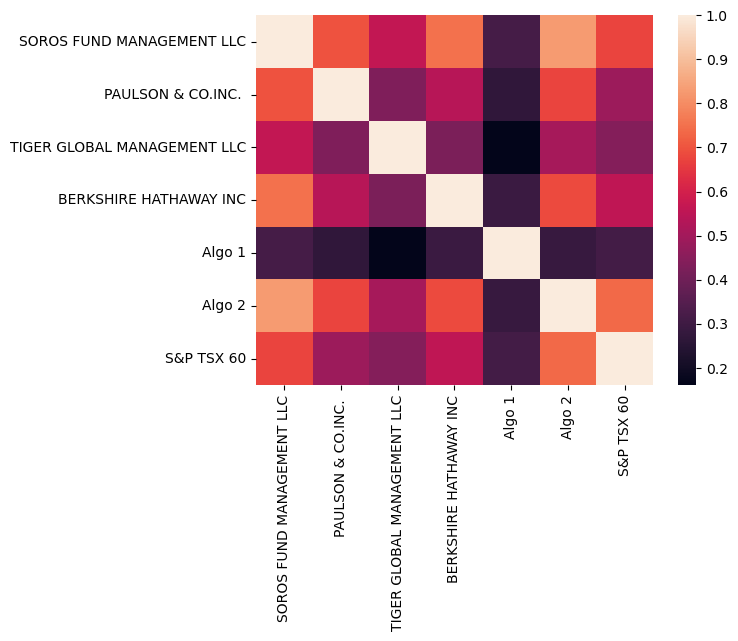

In [304]:
# Calculate the correlation
correlation = all_returns.corr()

# Display de correlation matrix
# Import Seaborn library
import seaborn as sns
# Use heatmap to visualize correlation matrix
sns.heatmap(correlation)

In [305]:
# Select highest portfolio with highest correlation to S&P TSX 60
tsx60_corr = correlation['S&P TSX 60'].sort_values().iloc[:-1]
tsx60_closest = [tsx60_corr.idxmax(), tsx60_corr[-1]]
tsx60_closest

['Algo 2', 0.7373701919333828]

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [144]:
# Calculate covariance of a single portfolio
# Using all_returns for daily returns of portfolio
covariance = all_returns[tsx60_closest[0]].rolling(21).cov(all_returns['S&P TSX 60']).dropna()
# Calculate variance of S&P TSX
variance = all_returns['S&P TSX 60'].rolling(21).var().dropna()
# Computing beta
portfolio_beta = (covariance / variance).dropna()

print(f"{tsx60_closest[0]} - TSX 60:")
print(f'Covariance: {covariance}')
print(f'Variance: {variance}')
print(f'Beta: {portfolio_beta}')

Algo 2 - TSX 60:
Covariance: Date
2015-03-31    0.000031
2015-04-01    0.000031
2015-04-02    0.000033
2015-04-06    0.000034
2015-04-07    0.000027
                ...   
2019-04-25    0.000011
2019-04-26    0.000011
2019-04-29    0.000010
2019-04-30    0.000012
2019-05-01    0.000012
Length: 1009, dtype: float64
Variance: Date
2015-03-31    0.000043
2015-04-01    0.000041
2015-04-02    0.000042
2015-04-06    0.000044
2015-04-07    0.000040
                ...   
2019-04-25    0.000011
2019-04-26    0.000011
2019-04-29    0.000011
2019-04-30    0.000010
2019-05-01    0.000010
Name: S&P TSX 60, Length: 1009, dtype: float64
Beta: Date
2015-03-31    0.710693
2015-04-01    0.753997
2015-04-02    0.770667
2015-04-06    0.778460
2015-04-07    0.675297
                ...   
2019-04-25    0.984012
2019-04-26    0.961270
2019-04-29    0.925981
2019-04-30    1.102528
2019-05-01    1.174038
Length: 1009, dtype: float64


<AxesSubplot:xlabel='Date'>

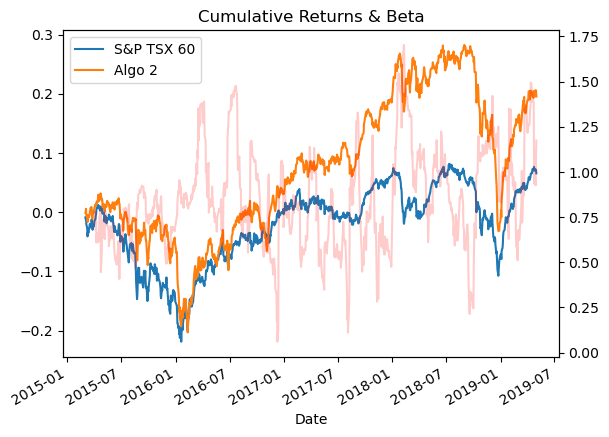

In [281]:
# Plot beta trend
# Create figure and axis
fig, ax1 = plt.subplots()
# Plot returns on left y-axis
cumulative_returns[['S&P TSX 60', 'Algo 2']].plot(ax=ax1, title='Cumulative Returns & Beta')
# Create 2nd y-axis on right side
ax2 = ax1.twinx()
# Plot beta to right y-axis
portfolio_beta.plot(ax=ax2, color='red', alpha=0.2)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

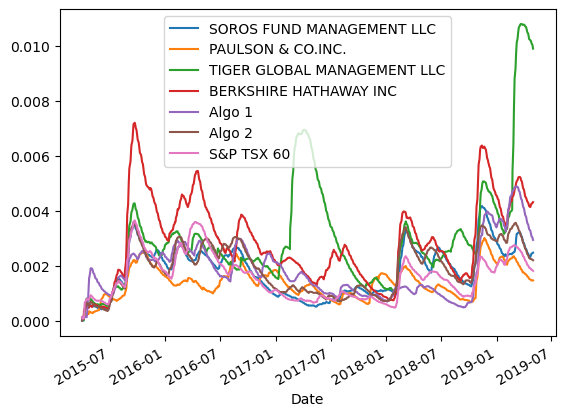

In [157]:
# Use `ewm` to calculate the rolling window
ewmstd = std_21d.ewm(halflife=21).std()
ewmstd.plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [160]:
# Annualized Sharpe Ratios
sharpe_ratios = (
    all_returns.mean() * trading_days / 
    (all_returns.std() * trading_days**0.5)
)

sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

<AxesSubplot:xlabel='Date'>

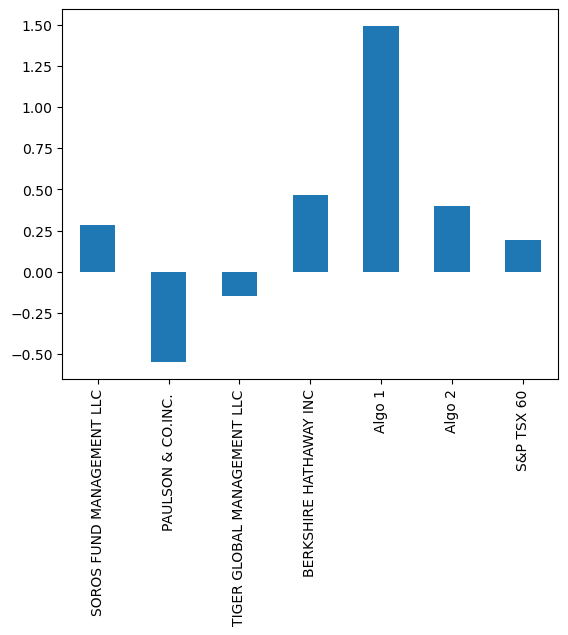

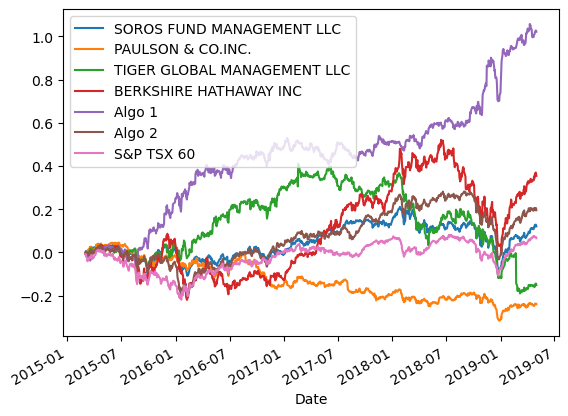

In [165]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()
cumulative_returns.plot()

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

The algorithmic strategies, especieally Algo 1, outperform both the market (S&P TSX 60) and the whale portfolios because it generates greater cumulative returns on top of having a higher Sharpe ratio, meaning a better risk-adjusted return.

That being said, Berkshire Hathaway has a great risk-adjusted return compared to the market and other portfolios, especially for a strategy that is not primarily actively traded.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [173]:
# Get stock data from yahoo finance (because google finance is depracated)
import yfinance as yf

In [287]:
# Reading data from 1st stock
tsla = yf.download('TSLA', period='5y')
tsla.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-19,22.684000,22.766001,22.020000,22.073334,22.073334,102375000
2017-12-20,22.179333,22.206667,21.669333,21.931999,21.931999,89307000
2017-12-21,21.972668,22.249332,21.813999,22.110666,22.110666,65778000
2017-12-22,21.967333,22.061333,21.654667,21.680000,21.680000,63237000
2017-12-26,21.588667,21.596001,21.105333,21.152666,21.152666,65676000


In [290]:
# Reading data from 2nd stock
aapl = yf.download('AAPL', period='5y')
aapl.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-19,43.757500,43.847500,43.522499,43.634998,41.492512,109745600
2017-12-20,43.717499,43.855000,43.312500,43.587502,41.447346,93902400
2017-12-21,43.542500,44.005001,43.525002,43.752499,41.604237,83799600
2017-12-22,43.669998,43.855000,43.625000,43.752499,41.604237,65397600
2017-12-26,42.700001,42.867500,42.419998,42.642502,40.548740,132742000


In [289]:
# Reading data from 3rd stock
hut = yf.download('HUT', period='5y')
hut.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-03-08,3.582,3.744,3.582,3.597,3.597,27400
2018-03-09,3.538,3.538,3.502,3.527,3.527,3400
2018-03-12,3.354,3.354,3.354,3.354,3.354,100
2018-03-13,3.250,3.319,3.129,3.129,3.129,6400
2018-03-14,2.971,2.971,2.971,2.971,2.971,600


In [293]:
# Combine all stocks in a single DataFrame
df_portfolio = pd.concat([tsla,aapl,hut], axis=1, keys=['TSLA','AAPL','HUT'])
df_portfolio.head()

TSLA                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2017-12-19  22.684000  22.766001  22.020000  22.073334  22.073334  102375000   
2017-12-20  22.179333  22.206667  21.669333  21.931999  21.931999   89307000   
2017-12-21  21.972668  22.249332  21.813999  22.110666  22.110666   65778000   
2017-12-22  21.967333  22.061333  21.654667  21.680000  21.680000   63237000   
2017-12-26  21.588667  21.596001  21.105333  21.152666  21.152666   65676000   

                 AAPL                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2017-12-19  43.757500  43.847500  43.522499  43.634998  41.492512  109745600   
2017-12-20  43.717499  43.855000  43.312500  43.587502  41.447346   93902400   
2017-12-21  43.542500  44.005001  43.525002  43.752499  41.604237   83799600   
2017-12-22  43.669998  43.855000  43.625000  43.752499  41.604237   65397600   
2017-12-26  42.700001  42.867500  42.419998  42.642502  40.548740  132742000   

            HUT                                  
           Open High Low Close Adj Close Volume  
Date                                             
2017-12-19  NaN  NaN NaN   NaN       NaN    NaN  
2017-12-20  NaN  NaN NaN   NaN       NaN    NaN  
2017-12-21  NaN  NaN NaN   NaN       NaN    NaN  
2017-12-22  NaN  NaN NaN   NaN       NaN    NaN  
2017-12-26  NaN  NaN NaN   NaN       NaN    NaN

In [294]:
# Reset Date index
# df_portfolio = df_portfolio.reset_index()
df_portfolio.head()

TSLA                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2017-12-19  22.684000  22.766001  22.020000  22.073334  22.073334  102375000   
2017-12-20  22.179333  22.206667  21.669333  21.931999  21.931999   89307000   
2017-12-21  21.972668  22.249332  21.813999  22.110666  22.110666   65778000   
2017-12-22  21.967333  22.061333  21.654667  21.680000  21.680000   63237000   
2017-12-26  21.588667  21.596001  21.105333  21.152666  21.152666   65676000   

                 AAPL                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2017-12-19  43.757500  43.847500  43.522499  43.634998  41.492512  109745600   
2017-12-20  43.717499  43.855000  43.312500  43.587502  41.447346   93902400   
2017-12-21  43.542500  44.005001  43.525002  43.752499  41.604237   83799600   
2017-12-22  43.669998  43.855000  43.625000  43.752499  41.604237   65397600   
2017-12-26  42.700001  42.867500  42.419998  42.642502  40.548740  132742000   

            HUT                                  
           Open High Low Close Adj Close Volume  
Date                                             
2017-12-19  NaN  NaN NaN   NaN       NaN    NaN  
2017-12-20  NaN  NaN NaN   NaN       NaN    NaN  
2017-12-21  NaN  NaN NaN   NaN       NaN    NaN  
2017-12-22  NaN  NaN NaN   NaN       NaN    NaN  
2017-12-26  NaN  NaN NaN   NaN       NaN    NaN

In [295]:
# Reorganize portfolio data by having a column per symbol (closing price)
df_portfolio_prices = df_portfolio.xs('Close', level=1, axis=1)
df_portfolio_prices.head()

,TSLA,AAPL,HUT
Date,,,
2017-12-19,22.073334,43.634998,NaN
2017-12-20,21.931999,43.587502,NaN
2017-12-21,22.110666,43.752499,NaN
2017-12-22,21.680000,43.752499,NaN
2017-12-26,21.152666,42.642502,NaN


In [297]:
# Calculate daily returns
df_daily_returns = df_portfolio_prices.pct_change()
# Drop NAs
df_daily_returns = df_daily_returns.dropna()
# Display sample data
df_daily_returns.head()

,TSLA,AAPL,HUT
Date,,,
2018-03-09,-0.005865,0.017181,-0.019461
2018-03-12,0.056057,0.009668,-0.049050
2018-03-13,-0.010622,-0.009630,-0.067084
2018-03-14,-0.044494,-0.008501,-0.050495
2018-03-15,-0.003153,0.001177,0.014810


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [298]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = df_daily_returns.dot(weights)
weighted_returns.name = 'My Portfolio'

# Display sample data
weighted_returns.head()

Date
2018-03-09   -0.002715
2018-03-12    0.005558
2018-03-13   -0.029112
2018-03-14   -0.034497
2018-03-15    0.004278
Name: My Portfolio, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [302]:
# Join your returns DataFrame to the original returns DataFrame
compare_returns = pd.concat([all_returns, weighted_returns], axis='columns', join='inner')
compare_returns
# all_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,My Portfolio
Date,,,,,,,,
2018-03-09,0.008935,0.004583,0.006096,0.020986,0.000631,0.012336,0.002517,-0.002715
2018-03-12,0.002217,0.000823,0.005385,-0.002575,-0.000236,0.001884,0.001732,0.005558
2018-03-13,-0.014822,-0.001928,-0.007092,-0.009928,0.004258,-0.003631,0.002714,-0.029112
2018-03-14,-0.006479,0.000569,-0.011131,0.002050,-0.002187,-0.004548,0.000413,-0.034497
2018-03-15,-0.004814,-0.004521,-0.012433,0.003955,-0.009779,-0.001499,0.001087,0.004278
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.005162
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,-0.057307
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.012014


In [303]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
compare_returns = compare_returns.dropna()
compare_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX 60                     0
My Portfolio                   0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [314]:
# Calculate the annualized `std`
daily_std = compare_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.009152
PAULSON & CO.INC.              0.007129
TIGER GLOBAL MANAGEMENT LLC    0.014226
BERKSHIRE HATHAWAY INC         0.014454
Algo 1                         0.007927
Algo 2                         0.008461
S&P TSX 60                     0.006170
My Portfolio                   0.023415
dtype: float64

In [315]:
annual_std = daily_std * (trading_days**0.5)
annual_std

SOROS FUND MANAGEMENT LLC      0.145291
PAULSON & CO.INC.              0.113165
TIGER GLOBAL MANAGEMENT LLC    0.225831
BERKSHIRE HATHAWAY INC         0.229454
Algo 1                         0.125839
Algo 2                         0.134309
S&P TSX 60                     0.097941
My Portfolio                   0.371697
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

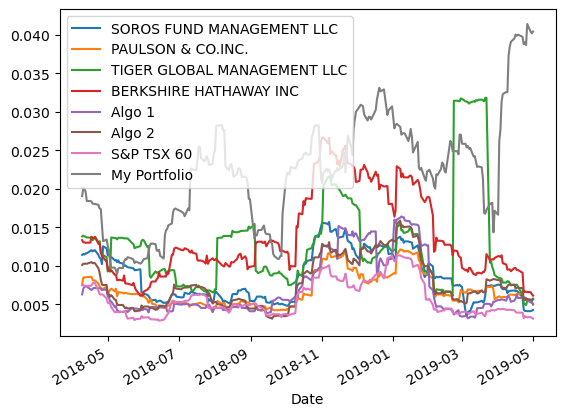

In [318]:
# Calculate rolling standard deviation
std_21d = compare_returns.rolling(21).std()
# Plot rolling standard deviation
std_21d.plot()

### Calculate and plot the correlation

<AxesSubplot:>

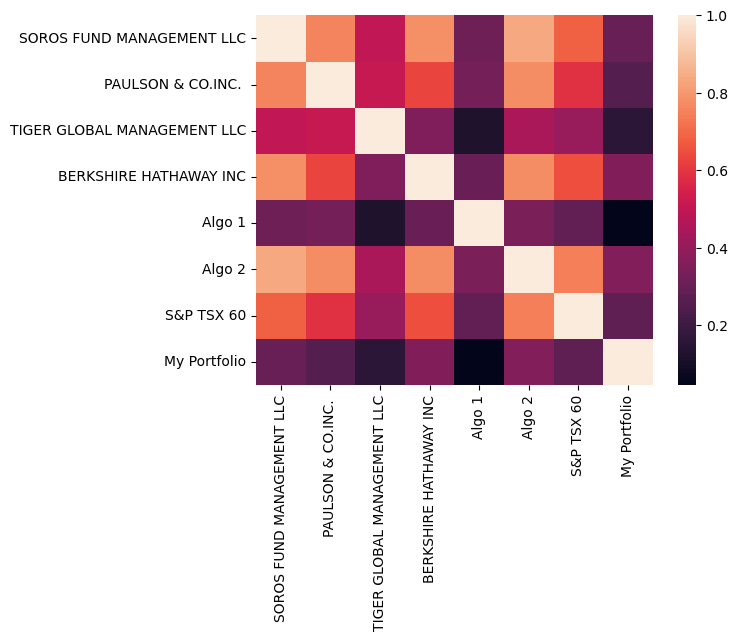

In [319]:
# Calculate and plot the correlation
correlation = compare_returns.corr()
sns.heatmap(correlation)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

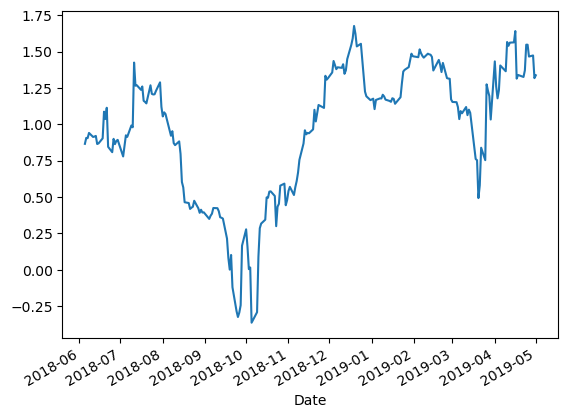

In [332]:
# Calculate and plot Beta
# Calculate covariance
portfolio_covariance = compare_returns['My Portfolio'].rolling(60).cov(compare_returns['S&P TSX 60']).dropna()

# Get variance
tsx_variance = compare_returns['S&P TSX 60'].rolling(60).var().dropna()

# Calculate Beta
portfolio_beta = portfolio_covariance / tsx_variance
portfolio_beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [41]:
# Calculate Annualized Sharpe Ratios


In [42]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!